In [6]:
#Import every library and package needed for project

#import pandas lib for table data.
import pandas as pd

#Our bayes model
from sklearn.naive_bayes import MultinomialNB
#Our logistic regression model
from sklearn.linear_model import LogisticRegression
#Our support vector machine model
from sklearn import svm

#Converts text words into numbers for model training.
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

import numpy as np
from sklearn.linear_model import LinearRegression

#import regex lib
import re

import matplotlib.pyplot as plt


annotatedData = pd.read_csv("data.txt", sep='\t')

In [7]:
#Selecting only columns that matter for model training.
corpus = annotatedData[['QueryText' , 'CommentText']]

y = pd.DataFrame({'NumericScor' : annotatedData['NumericScor']})

#y = annotatedData['NumericScor']

#query_vectorizer = CountVectorizer(ngram_range=(1,1)) # to use bigrams ngram_range=(2,2)
#query_vectors = query_vectorizer.fit_transform(annotatedData['QueryText'])

comment_vectorizer = CountVectorizer(ngram_range=(1,1))
comment_vectors = comment_vectorizer.fit_transform(annotatedData['CommentText'])

#comment_vectorizer = TfidfVectorizer()
#comment_vectors = comment_vectorizer.fit_transform(annotatedData['CommentText'])

comment_columns = comment_vectorizer.get_feature_names()

print(y.NumericScor.unique())

[0.98 0.6  0.83 0.66 0.56 0.61 0.67 0.65 0.55 0.69 0.63 0.36 0.62 0.15
 0.3  0.17 0.33 0.59 0.68 0.71 0.2  0.94 0.05 0.19 0.35 0.13 0.92 0.73
 0.7  0.29 0.4  0.95 0.51 0.52 0.8  0.82 0.42 0.45 0.79 0.44 0.87 0.91
 0.88 0.81 0.14 0.11 0.41 0.48 0.77 0.9  0.39 0.31 0.78 0.64 0.1  0.89
 0.34 0.09 0.02 0.12 0.58 0.16 0.84 0.57 0.54 0.76 0.28 0.01 0.38 0.21
 0.53 0.18 0.   0.22 0.85 0.27 0.37 0.86 0.32 0.93 0.43 1.   0.03 0.46
 0.99]


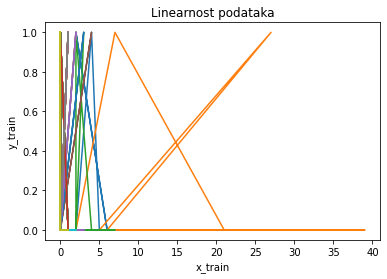

In [8]:
#returns number of words in string.
def countWords(s):
    return len(re.findall(r'\w+', s))

#find common words in two strings.
def findCommonWords(s1, s2):
      s1 = s1.lower()
      s2 = s2.lower()
      s1List = s1.split(" ")
      s2List = s2.split(" ")
      return len(list(set(s1List)&set(s2List)))
    

#makes new dataframe which is then used to train our models.
def processData(corpus, y) :
    
    allColumns = ['numWordsQuery','numWordsComment','numCommonWords','NumericScor']
    
    for name in comment_columns:
        allColumns.append(name)      
         
    d = {}
    
    for column in allColumns:
        d[column] = []
        
    for index,row in corpus.iterrows():
        
        d['numWordsQuery'].append(countWords(row['QueryText']))
        d['numWordsComment'].append(countWords(row['CommentText']))
        d['numCommonWords'].append(findCommonWords(row['QueryText'],row['CommentText']))
        d['NumericScor'].append(y.iloc[index]['NumericScor'])
    
        vectorComment = comment_vectorizer.transform([row['CommentText']])
        vectorComment = vectorComment.toarray()
    
        for i, commentCol in enumerate(allColumns[4:]):
            d[commentCol].append(vectorComment[0][i])
         
        
    return pd.DataFrame.from_dict(d)
                          
                                 
trainingData = processData(corpus,y)    

y = trainingData['NumericScor']
y = y.astype('int')

X = trainingData.drop('NumericScor', 1)


x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

plt.plot(x_train, y_train)


plt.xlabel('x_train')
# naming the y axis
plt.ylabel('y_train')
  
# giving a title to my graph
plt.title('Linearnost podataka')
  
# function to show the plot
plt.show()

In [9]:
#Linearna regresija

linReg = LinearRegression()

linReg.fit(x_train, y_train)

#skf = StratifiedKFold(n_splits=3)
#params = {}
#nb = LinearRegression()
#gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)

#p_reg = Pipeline([('classifier', nb)])
#acc = cross_val_score(p_reg, X, y, cv = 10);

#gs.fit(X,y)

#bestModel = gs.best_estimator_

LinearRegression()

In [10]:
#predicted = bestModel.predict(x_test)
predicted = linReg.predict(x_test)

type(predicted)
#print(np.argmax(predicted))
#print(predicted[96])

#sorted_index_array = np.argsort(predicted)
#sorted_array = predicted[sorted_index_array]

sorted = np.sort(predicted)

n = 30

rslt = sorted[-n : ]

print(rslt)

[0.03226252 0.03333508 0.03385906 0.03423218 0.03458986 0.03466207
 0.03495164 0.03748651 0.0377582  0.03790685 0.03820644 0.03823465
 0.04391477 0.04506968 0.04549275 0.05345643 0.05646877 0.05810595
 0.06102118 0.06102118 0.06180707 0.06231959 0.06706612 0.08196303
 0.09916407 0.11978357 0.13751863 0.13910212 0.23134206 0.92521453]
